<a href="https://colab.research.google.com/github/rahmanole/MDTrAnal/blob/master/notebook/KCUSUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from google.colab import drive
drive.mount('/content/drive')
import os
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/internship works/MDTrAnal/lib')

from codar.oas.MDTrSampler import MDTrSampler, svd_wrapper
!pip install parmed
import parmed

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 31.2 MB/s 
  Created wheel for parmed: filename=ParmEd-3.4.3-cp37-cp37m-linux_x86_64.whl size=807326 sha256=e49f0ea995c8131eef66ffe75747504cbe8f178c06581a60238e5c91c5ab6665
  Stored in directory: /root/.cache/pip/wheels/2f/26/b3/8cb8da47601e3057598009e903ba5d71e3a8ff08bcbc65cd1e
Successfully built parmed


In [7]:
def gk(x,y):
  return np.exp(-((x-y)**2/2.0))


def mmd(x_n_1, x_n, y_n_1, y_n,delta=0):

    xx = gk(x_n_1, x_n)
    yy = gk(y_n_1, y_n)
    xy = gk(x_n_1, y_n)
    yx = gk(x_n, y_n_1)
  
    return xx + yy - xy - yx - delta

In [ ]:
sample_x_1 = np.random.normal(0,1,size=1000)
sample_x_2 = np.random.normal(0,2,size=1000)
sample_x = np.concatenate((sample_x_1, sample_x_2))

# sample_x = np.random.normal(0,1,size=2000)
# sample_x[700] = 9
# sample_x[1000] = 10
# sample_x[1300] = 8

sample_y = np.random.normal(0,1,size=2000)
sample_z = np.random.normal(0,2,size=2000)
sample_w = np.random.normal(0,1,size=2000)


sample_x_CUSUM = np.cumsum(sample_x)
sample_y_CUSUM = np.cumsum(sample_y)

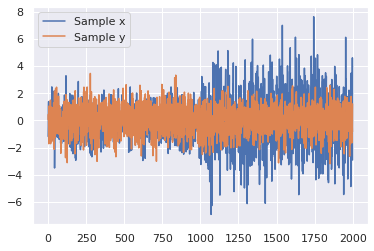

In [ ]:
plt.plot(np.arange(0,2000),sample_x, label='Sample x')
plt.plot(np.arange(0,2000),sample_y, label='Sample y')
plt.legend()

In [42]:
def KCUSUM(sample_x,sample_y,h=0,delta=0):
    Z_n = 0
    n = len(sample_x)
    T_kcusum = 0
 

    for i in range(3,n):

        x_0 = sample_x[i-1]
        x_1 = sample_x[i]

        y_0 = sample_y[i-1]
        y_1 = sample_y[i]

        if i%2 == 0:
            v_n = mmd(x_0,x_1,y_0,y_1,delta)
        else:
            v_n = 0

        Z_n += v_n
        if Z_n < 0:
            Z_n = 0

        if Z_n > h: 
            T_kcusum = i
            break

    return T_kcusum 

In [ ]:
def plot_time_vs_v(sample_x,sample_y,h,delta=0):
    Z_n = 0
    h >= 0
    n = len(sample_x)
    T_kcusum = []
 

    for i in range(1,n):

        x_0 = sample_x[i-1]
        x_1 = sample_x[i]

        y_0 = sample_y[i-1]
        y_1 = sample_y[i]

        if i%2 == 0:
            v_n = mmd(x_0,x_1,y_0,y_1,delta)
            #print(v_n)
            T_kcusum.append((i,v_n))

    cp = np.array(T_kcusum)
    print(np.mean(cp[:,1]))

    plt.plot(cp[:,0],cp[:,1])
    plt.xlabel('Times')
    plt.ylabel('V_n')

-0.013273979925494601


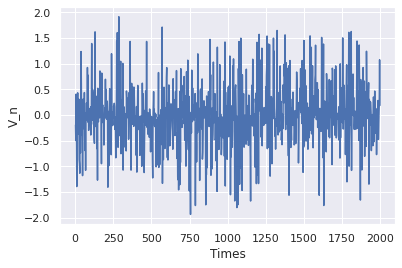

In [ ]:
plot_time_vs_v(sample_x,sample_y,10,0.05)

In [ ]:
def cp_vs_h(sample_x,sample_y,h_start,h_end,step,delta):
    cps = []
    hs = []
    while h_start<h_end:
        cp = KCUSUM(sample_x,sample_y,h_start,delta)
        hs.append(h_start)
        cps.append(cp)
        h_start += step
        plt.plot(hs,cps)
        plt.xlabel('Value of h')
        plt.ylabel('Change points')

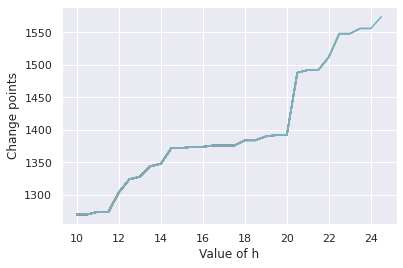

In [ ]:
cp_vs_h(sample_x,sample_y,10,25,0.5,0.05)

In [ ]:
def plot_time_vs_z(sample_x,sample_y,h,delta=0):
    Z_n = 0
    h >= 0
    n = len(sample_x)
    T_kcusum = []
    #values_Z_n = []
 

    for i in range(1,n):

        x_0 = sample_x[i-1]
        x_1 = sample_x[i]

        y_0 = sample_y[i-1]
        y_1 = sample_y[i]

        if i%2 == 0:
            v_n = mmd(x_0,x_1,y_0,y_1,delta)
            #print(v_n)
        else:
            v_n = 0

        Z_n += v_n
        #print('value of z_n',Z_n)
        if Z_n < 0:
            Z_n = 0

        #if Z_n > h: 
        T_kcusum.append((i,Z_n))

            #break
    cp = np.array(T_kcusum)
    print(np.mean(cp[:,1]))
    plt.plot(cp[:,0],cp[:,1])
    plt.ylabel('Value of Z')
    plt.xlabel('Time Points')


10.553570074342105


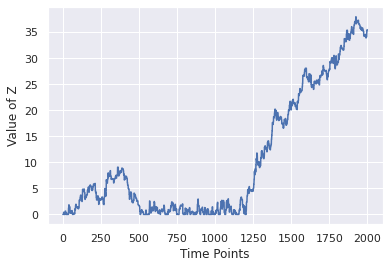

In [ ]:
plot_time_vs_z(sample_x,sample_y,0,0.05)

14.580352325129763


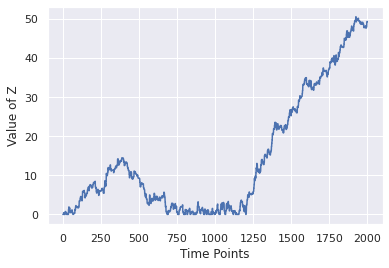

In [ ]:
plot_time_vs_z(sample_x,sample_y,0,0.015)

6.315143159349803


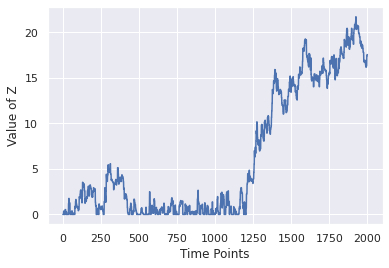

In [ ]:
plot_time_vs_z(sample_x,sample_y,0,0.095)

In [ ]:
KCUSUM(sample_x,sample_y,10,0.05)

1270

In [ ]:
y = np.arange(2000)
def cdp_by_slope(x,y):
    ms = []
    for i in range(1,len(x)):
        dx = x[i-1] - x[i]
        dy = y[i-1] - y[i]

        m = dy/dx
        ms.append(m)

    return ms

#cdp_by_slope(sample_x,sample_y)

### Testing with real data

In [28]:
incoming = np.random.normal(0, 1, size=(300, 3))
ref = incoming.copy()

## injecting 150 change points
rand_index = np.random.randint(0,300,size=150)
for i in range(len(rand_index)):
    ind = rand_index[i]
    incoming[ind] = np.random.randint(0,100,size=(3))


In [16]:
#Ut, St, VTt = svd_wrapper(incoming, 2, method='random')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


In [17]:
#Ut2, St2, VTt2 = svd_wrapper(ref, 2, method='random')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


In [29]:
## took the sum of x,y,z cordinates like: (x+y+z)/3
incoming = [sum(ar)/3 for ar in incoming]
ref = [sum(ar)/3 for ar in ref]

In [44]:
KCUSUM(incoming,ref,6,0.05)

[65.33333333333333,
 -0.16304893684648428,
 79.66666666666667,
 -0.10470105099631215,
 0.1630113062756644,
 42.666666666666664,
 70.33333333333333,
 44.333333333333336,
 -0.3167597925645554,
 73.66666666666667,
 0.024896326455692248,
 62.666666666666664,
 0.003241143682977121,
 41.666666666666664,
 51.333333333333336,
 42.666666666666664,
 55.0,
 34.0,
 -0.3783381500288013,
 66.66666666666667,
 0.4846757206026225,
 18.0,
 27.666666666666668,
 -0.21320378683105276,
 0.27317376390781123,
 60.666666666666664,
 0.03672535420903792,
 0.7079070937693152,
 1.0315301227645328,
 -0.8790475380830388,
 -0.7179688593121131,
 60.666666666666664,
 -0.11529436389985663,
 -0.5136674500065481,
 -0.327246243612413,
 -1.761018307983461,
 0.03353501606802822,
 29.333333333333332,
 34.0,
 -0.06413450352577109,
 29.666666666666668,
 0.17718773237125504,
 -0.7037188377588915,
 42.333333333333336,
 -0.7818722910273901,
 0.3666290689633531,
 0.12199446783685226,
 -0.8774937668052724,
 -0.6472099276907798,
 -0.

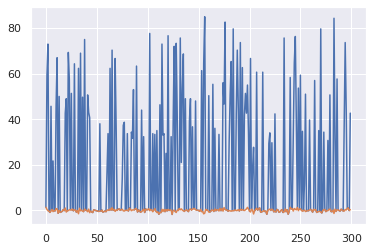

In [41]:
plt.plot(np.arange(300),incoming)
plt.plot(np.arange(300),ref)

In [39]:
np.cumsum(ref)

array([  1.31445534,   1.70838653,   1.53247124,   1.16338193,
         0.24950456,  -0.12798892,   0.23975481,  -0.3360377 ,
        -0.53846447,  -0.81581502,  -0.07485385,   0.51291486,
        -0.81798238,  -0.88235724,  -1.80340621,  -2.51763898,
        -2.96475561,  -2.6782837 ,  -2.82327024,  -1.83874066,
        -2.61377038,  -2.8752922 ,  -3.01606627,  -2.80211478,
        -2.56976065,  -2.52698711,  -1.96056648,  -2.18950624,
        -1.95254758,  -1.9597126 ,  -2.82949978,  -2.91409484,
        -4.43083865,  -3.54687347,  -3.79212258,  -3.71173577,
        -4.09472054,  -4.68117159,  -4.15058504,  -4.07511224,
        -4.14244749,  -4.77884584,  -4.27726718,  -5.32238099,
        -5.63477423,  -6.38182683,  -7.37757442,  -7.19454257,
        -7.18181787,  -7.29472735,  -7.53423355,  -7.92150574,
        -8.4320898 ,  -8.81115356,  -9.21335836,  -9.12404844,
        -9.94408285, -10.54894497, -10.85221701, -11.47919203,
       -11.53115553, -11.31127571, -11.35779018, -10.74